# TD 6

## Exo 10.3

In [1]:
A.<x,y> = QQ[]
f = x^2 - 2
g = x^3 - 7

In [2]:
h = f.resultant(g(x=y-x), x)
h

y^6 - 6*y^4 - 14*y^3 + 12*y^2 - 84*y + 41

On vérifie que $2^{1/2} + 7^{1/3}$ est bien une racine

In [3]:
h(y=2^(1/2) + 7^(1/3)).expand()

0

## Exo 10.5

In [4]:
A.<X,Y> = QQ[]
f = X^4 + Y^4 - 1
g = X^5*Y^2 - 4*X^3*Y^3 + X^2*Y^5 - 1

La projection de la variété sur l'axe des $X$ est composée de 28 points

In [5]:
h = f.resultant(g, Y)
h

2*X^28 - 16*X^27 + 32*X^26 + 249*X^24 + 48*X^23 - 128*X^22 + 4*X^21 - 757*X^20 - 112*X^19 + 192*X^18 - 12*X^17 + 758*X^16 + 144*X^15 - 126*X^14 + 28*X^13 - 251*X^12 - 64*X^11 + 30*X^10 - 36*X^9 - X^8 + 16*X^5 + 1

Seulement 4 de ces points sont réels

In [6]:
h.change_ring(RR).factor()

(2.00000000000000) * (X - 0.966506296874216) * (X - 0.721113386166218) * (X + 0.597428986963397) * (X + 0.924209668349044) * (X^2 - 9.64588608545517*X + 27.2478986510189) * (X^2 - 2.07381031598562*X + 1.07569410961252) * (X^2 - 0.893217025895166*X + 0.295336342296285) * (X^2 - 0.779939824160087*X + 0.428337852683492) * (X^2 - 0.121266599180110*X + 1.03967187384805) * (X^2 - 0.0603056667782709*X + 0.938887472264107) * (X^2 + 0.0272947089885237*X + 1.03310413303256) * (X^2 + 0.228048118439437*X + 0.407906285068887) * (X^2 + 0.525249644063553*X + 0.343345271720577) * (X^2 + 1.29090151259232*X + 0.509689390328851) * (X^2 + 1.65011569846010*X + 4.77398949422654) * (X^2 + 2.01879686263848*X + 1.01964113877716)

Pour mieux manipuler le polynôme $h$, on change son parent

In [7]:
H = h.univariate_polynomial()

In [8]:
parent(h)

Multivariate Polynomial Ring in X, Y over Rational Field

In [9]:
parent(H)

Univariate Polynomial Ring in X over Rational Field

On peut voir directement ses racines réelles

In [10]:
H.roots(RR)

[(-0.924209668349044, 1),
 (-0.597428986963397, 1),
 (0.721113386166218, 1),
 (0.966506296874216, 1)]

In [11]:
H.roots?

Docstring:     
   Return the roots of this polynomial (by default, in the base ring
   of this polynomial).

   INPUT:

   * "ring" - the ring to find roots in

   * "multiplicities" - bool (default: True) if True return list of
     pairs (r, n), where r is the root and n is the multiplicity. If
     False, just return the unique roots, with no information about
     multiplicities.

   * "algorithm" - the root-finding algorithm to use. We attempt to
     select a reasonable algorithm by default, but this lets the
     caller override our choice.

   By default, this finds all the roots that lie in the base ring of
   the polynomial. However, the ring parameter can be used to specify
   a ring to look for roots in.

   If the polynomial and the output ring are both exact (integers,
   rationals, finite fields, etc.), then the output should always be
   correct (or raise an exception, if that case is not yet handled).

   If the output ring is approximate (floating-point real or compl

Plus utile pour nous: on prend la liste des racines, sans les multiplicités

In [12]:
H.roots(RR, multiplicities=False)

[-0.924209668349044, -0.597428986963397, 0.721113386166218, 0.966506296874216]

On évalue $f$ et $g$ en les racines, pour retrouver les valeurs de $Y$ qui correspondent. On conclut que les courbes ont exactement 4 points d'intersection réels.

In [13]:
[(r, f(X=r).univariate_polynomial().roots(RR, multiplicities=False))
 for r in H.roots(RR, multiplicities=False)]

[(-0.924209668349044, [-0.721113386166218, 0.721113386166218]),
 (-0.597428986963397, [-0.966506296874216, 0.966506296874216]),
 (0.721113386166218, [-0.924209668349044, 0.924209668349044]),
 (0.966506296874216, [-0.597428986963397, 0.597428986963397])]

In [14]:
[(r, g(X=r).univariate_polynomial().roots(RR, multiplicities=False))
 for r in H.roots(RR, multiplicities=False)]

[(-0.924209668349044, [0.721113386166218]),
 (-0.597428986963397, [0.966506296874216]),
 (0.721113386166218,
  [-1.63522612855497, -0.924209668349044, 1.74160318999678]),
 (0.966506296874216,
  [-2.04507691212831, -0.597428986963397, 1.88331929776419])]

Pour mieux visualiser ces solutions, on les dessine

In [15]:
implicit_plot?

Signature:      implicit_plot(*args, **kwds)
Docstring:     
   "implicit_plot" takes a function of two variables, f(x, y) and
   plots the curve f(x,y) = 0 over the specified "xrange" and "yrange"
   as demonstrated below.

   "implicit_plot(f, (xmin,xmax), (ymin,ymax), ...)"

   "implicit_plot(f, (x,xmin,xmax), (y,ymin,ymax), ...)"

   INPUT:

   * "f" -- a function of two variables or equation in two variables

   * "(xmin,xmax)" -- 2-tuple, the range of "x" values or
     "(x,xmin,xmax)"

   * "(ymin,ymax)" -- 2-tuple, the range of "y" values or
     "(y,ymin,ymax)"

   The following inputs must all be passed in as named parameters:

   * "plot_points" -- integer (default: 150); number of points to
     plot in each direction of the grid

   * "fill" -- boolean (default: "False"); if "True", fill the
     region f(x, y) < 0.

   * "fillcolor" -- string (default: "'blue'"), the color of the
     region where f(x,y) < 0 if "fill = True". Colors are defined in
     "sage.plot.colors";

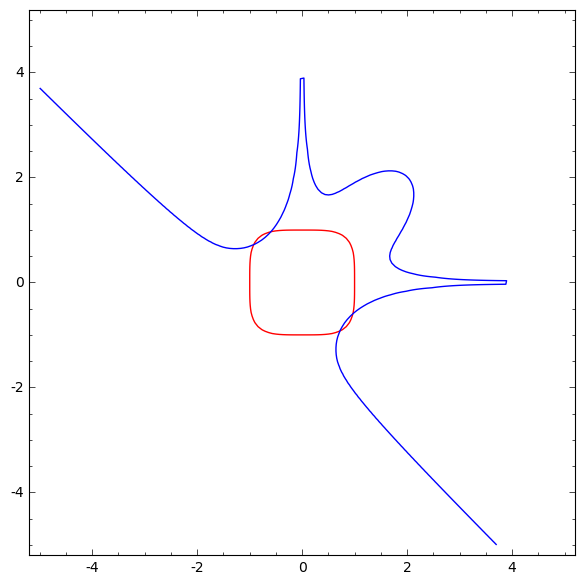

In [17]:
implicit_plot(f, (X,-5,5), (Y,-5,5), color='red') + implicit_plot(g, (X,-5,5), (Y,-5,5))

## Exo 10.6

In [18]:
A.<v,u,w,x,y,z> = PolynomialRing(QQ, order='lex')
I = A.ideal(v*x - u^2, 
            u*y - v^2,
            z - u)

On voit que, puisqu'on n'a pas ajouté d'équation pour interdire aux dénominateurs de s'annuler, l'équation implicite contient un hyperplan $z=0$ qui n'appartient pas à la courbe paramétrée.

In [19]:
G = I.groebner_basis()
G

[v^2 - y*z, v*x - z^2, v*z^2 - x*y*z, u - z, x^2*y*z - z^4]

On ajoute donc une équation pour interdire à $u$ et $v$ de s'annuler.

In [23]:
I = A.ideal(v*x - u^2, 
            u*y - v^2,
            z - u,
            1 - w*u*v)

In [24]:
G = I.groebner_basis()

On remarque tout de même que le point $(0,0,0)$ fait partie de la clôture de Zariski, mais pas de la courbe paramétrée. En effet, la valeur $x=y=z=0$ ne peut pas être remontée en une solution pour $u,v,w$.

In [25]:
G

[v - w*y*z^2, u - z, w*x*y - 1, w*z^3 - x, x^2*y - z^3]

In [26]:
A.<t,w,x,y,z> = PolynomialRing(QQ, order='lex')
I = A.ideal(x - (t^2 + t + 1),
            y*(t^2 + 1) - (t^2 - 1),
            1 - w*(t^2 + 1))

In [27]:
I.elimination_ideal([t,w])

Ideal (x^2*y^2 - 2*x^2*y + x^2 + 4*x*y - 4*x + y^2 + 3) of Multivariate Polynomial Ring in t, w, x, y, z over Rational Field

Ici, par contre, pas de problème pour remonter toute solution $x,y$: la clôture de Zariski coïncide avec la courbe paramétrée

In [28]:
G = I.groebner_basis()
G

[t + 1/2*x^2*y - 1/2*x^2 + x + 1/2*y + 1/2, w + 1/2*y - 1/2, x^2*y^2 - 2*x^2*y + x^2 + 4*x*y - 4*x + y^2 + 3]

## Exo 10.7

In [29]:
R.<h,x,A,a,b,c> = PolynomialRing(QQ, order='lex')

On met dans l'idéal des rélations la formule pour le calcul de la surface, ainsi que le théorème de Pitagore.

In [30]:
I = R.ideal(A - c*h / 2,
            a^2 - h^2 - x^2,
            b^2 - h^2 - (c - x)^2)

En éliminant les variables autres que $A,a,b,c$, on trouve une équation qui lie ces quatre variables.

In [31]:
G = I.groebner_basis()
G

[h^2 + x^2 - a^2, h*A + 1/4*x*a^2 - 1/4*x*b^2 - 3/8*a^2*c - 1/8*b^2*c + 1/8*c^3, h*a^2 - h*b^2 - 4*x*A + 2*A*c, h*c - 2*A, x*c - 1/2*a^2 + 1/2*b^2 - 1/2*c^2, A^2 + 1/16*a^4 - 1/8*a^2*b^2 - 1/8*a^2*c^2 + 1/16*b^4 - 1/8*b^2*c^2 + 1/16*c^4]

In [32]:
f = G[-1]
f

A^2 + 1/16*a^4 - 1/8*a^2*b^2 - 1/8*a^2*c^2 + 1/16*b^4 - 1/8*b^2*c^2 + 1/16*c^4

L'équation est plus lisible si on la factorise

In [33]:
(f - A^2).factor()

(1/16) * (-a + b - c) * (-a + b + c) * (a + b - c) * (a + b + c)